In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import requests
from pathlib import Path
from tqdm.notebook import tqdm

from IPython.display import Video

In [2]:
IMG_PATH = Path('./img/001-images')
IMG_PATH.mkdir(parents=True, exist_ok=True)
IMG_PATH

PosixPath('img/001-images')

In [3]:
IMGS = dict()

# Channels

One convention for images is for them to be represented as 3D matrices (tensors).
The first 2 dimensions of the image are just the pixels in the $x$-$y$ directions.
The thrid dimention for each pixel is an RGB (red-green-blue) tuple.
Each member of the tuple if a "channel".
Each member of the tuple can be represented by a u8 (unsigned integer of size 8-bits) that ranges from 0 to 255 ($2^8-1$, the offset of minus 1 is because we are counting from 0 instead of from 1).

## References

- [opencv: Drawing Functions in OpenCV](https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html)

In [4]:
def cv_img_from_url(img_url: str, img_path: Path = IMG_PATH):
    img_data = requests.get(img_url).content
    with open(img_path, 'wb') as f:
        f.write(img_data)

    # Opencv reads images in BGR.
    return cv.imread(img_path)

In [5]:
def split_img_into_channels(img, /, figsize: tuple):
    """
    INPUTS
    ------
    img: the output of a call such as cv.imread()
    """
    print(f'image size: {img.shape}')
    
    # Convert BGR to RGB.
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    print(f'min and max values of the image: {np.min(img)}, {np.max(img)}')

    # Separate the image into channels.
    b_channel, g_channel, r_channel = cv.split(img)
    print(f'Size of each channel: {b_channel.shape}, {g_channel.shape}, {r_channel.shape}')

    plt.figure(figsize=figsize)

    # Show channels as gray-scale images.
    # Remember that 0 (absence of the colour) is black and 255 (all of the colour) is white.
    plt.subplot(3, 3, 1)
    plt.imshow(b_channel, cmap='gray', vmin=0, vmax=255)
    plt.title('Blue Channel')
    plt.axis('off')
    
    plt.subplot(3, 3, 2)
    plt.imshow(g_channel, cmap='gray', vmin=0, vmax=255)
    plt.title('Green Channel')
    plt.axis('off')
    
    plt.subplot(3, 3, 3)
    plt.imshow(r_channel, cmap='gray', vmin=0, vmax=255)
    plt.title('Red Channel')
    plt.axis('off')

    # Now show each channel as it is.
    mask = np.zeros_like(img[:, :, 0])
    b_img = cv.merge([b_channel, mask,      mask])
    g_img = cv.merge([mask,      g_channel, mask])
    r_img = cv.merge([mask,      mask,      r_channel])
        
    plt.subplot(3, 3, 4)
    plt.imshow( cv.cvtColor(b_img, cv.COLOR_BGR2RGB) )
    plt.axis('off')
    
    plt.subplot(3, 3, 5)
    plt.imshow( cv.cvtColor(g_img, cv.COLOR_BGR2RGB) )
    plt.axis('off')
    
    plt.subplot(3, 3, 6)
    plt.imshow( cv.cvtColor(r_img, cv.COLOR_BGR2RGB) )
    plt.axis('off')

    plt.subplot(3, 3, 7)
    plt.imshow(img_rgb)
    plt.axis('off')
    
    plt.show()

image size: (1024, 687, 3)
min and max values of the image: 0, 255
Size of each channel: (1024, 687), (1024, 687), (1024, 687)


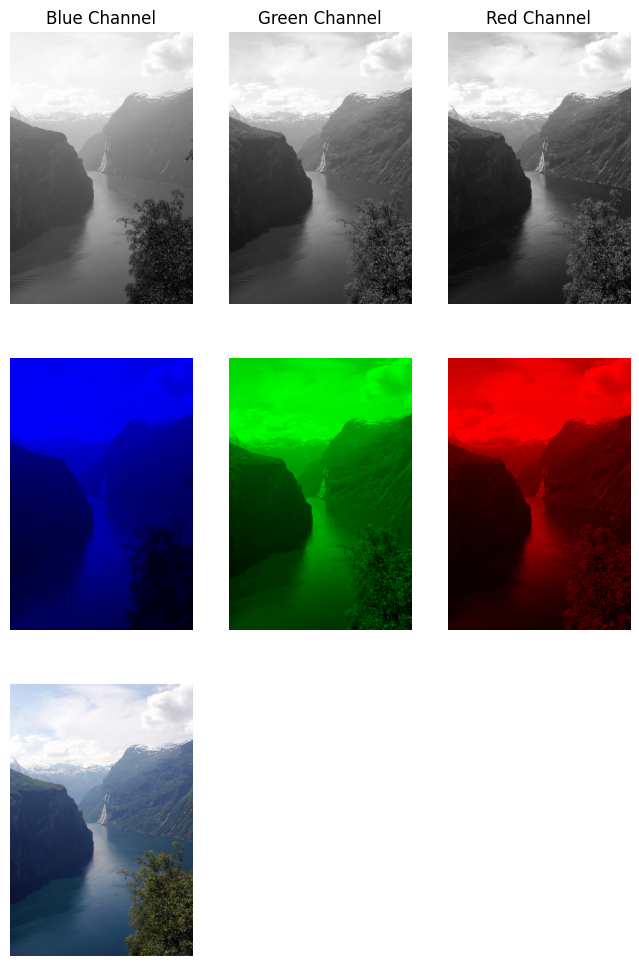

In [6]:
# From https://en.wikipedia.org/wiki/Fjord
fjord_url = 'https://upload.wikimedia.org/wikipedia/commons/7/78/Geirangerfjord_%286-2007%29.jpg'
IMGS['fjord.jpg'] = IMG_PATH / 'fjord.jpg'

split_img_into_channels( cv_img_from_url(fjord_url, IMGS['fjord.jpg']), figsize=(8, 12) )

image size: (241, 300, 3)
min and max values of the image: 4, 255
Size of each channel: (241, 300), (241, 300), (241, 300)


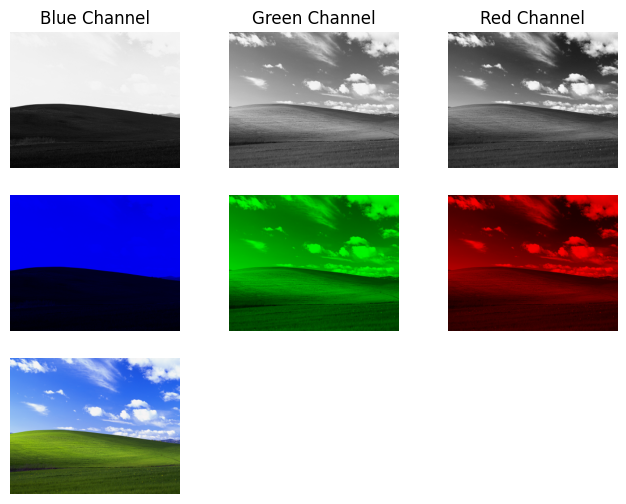

In [7]:
# https://en.wikipedia.org/wiki/Bliss_(photograph)
# https://en.wikipedia.org/wiki/Bliss_(photograph)#/media/File:Bliss_(Windows_XP).png
bliss_url = 'https://upload.wikimedia.org/wikipedia/en/2/27/Bliss_%28Windows_XP%29.png'
IMGS['bliss.jpg'] = IMG_PATH / 'bliss.jpg'

split_img_into_channels( cv_img_from_url(bliss_url, IMGS['bliss.jpg']), (8, 6) )

image size: (563, 1000, 3)
min and max values of the image: 0, 255
Size of each channel: (563, 1000), (563, 1000), (563, 1000)


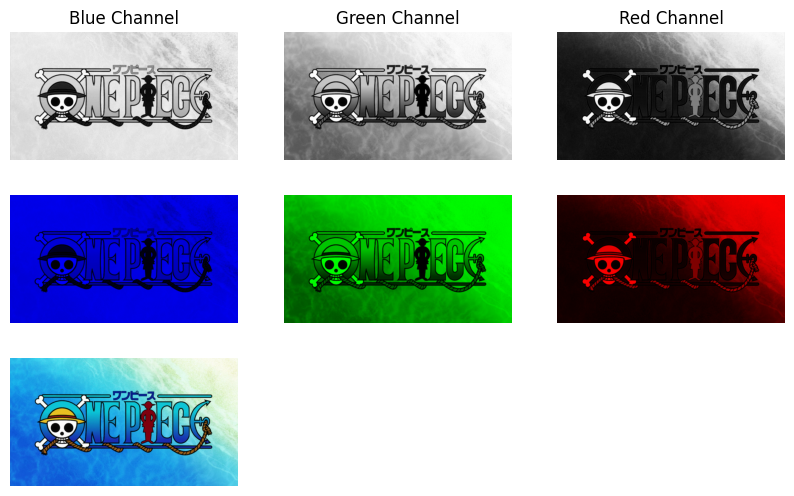

In [8]:
# https://onepiece.fandom.com/wiki/One_Piece_(Anime)
onepiece_url = 'https://static.wikia.nocookie.net/onepiece/images/8/87/One_Piece_Anime_Logo.png/revision/latest/scale-to-width-down/1000?cb=20140921221019'
IMGS['op.png'] = IMG_PATH / 'op.png'

split_img_into_channels( cv_img_from_url(onepiece_url, IMGS['op.png']), (10, 6) )

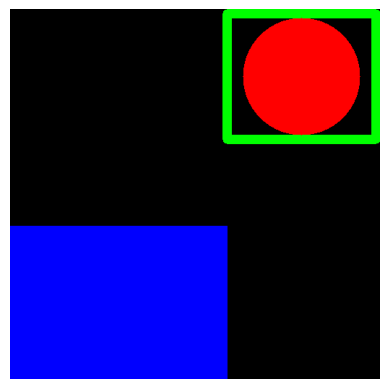

In [8]:
img = np.zeros((512, 512, 3), np.uint8)

# height 6 because we are going to make the thickness 12. So 6 makes the upper half of the rectangle line not get cut-off.
green_rect_thickness = 6
green_rect_edge1  = (300, green_rect_thickness)
green_rect_edge2  = (506,180)
rect_x_mid = (green_rect_edge2[0]-green_rect_edge1[0])//2
rect_y_mid = (green_rect_edge2[1]-green_rect_edge1[1])//2

red_circle_center = (green_rect_edge1[0]+rect_x_mid, green_rect_edge1[1]+rect_y_mid)
red_circle_rad    = min(rect_x_mid, rect_y_mid) - green_rect_thickness


cv.rectangle(img, green_rect_edge1,  green_rect_edge2, (0, 255, 0), green_rect_thickness*2)
cv.circle(img,    red_circle_center, red_circle_rad,   (0, 0, 255), -1)
cv.rectangle(img, (0, 300),           (300, 600), (255, 0, 0), -1)

plt.imshow(img[..., ::-1])  # Convert BGR to RGB for display.
plt.axis('off')    
plt.show()

image size: (512, 512, 3)
min and max values of the image: 0, 255
Size of each channel: (512, 512), (512, 512), (512, 512)


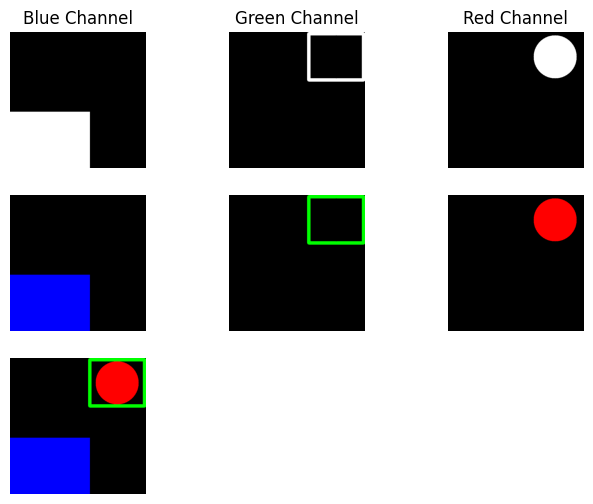

In [9]:
split_img_into_channels( img, (8, 6) )

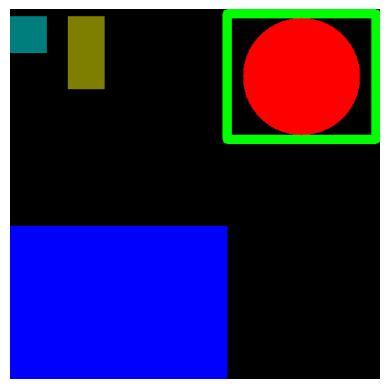

In [10]:
img = np.zeros((512, 512, 3), np.uint8)

# height 6 because we are going to make the thickness 12. So 6 makes the upper half of the rectangle line not get cut-off.
green_rect_thickness = 6
green_rect_edge1  = (300, green_rect_thickness)
green_rect_edge2  = (506,180)
rect_x_mid = (green_rect_edge2[0]-green_rect_edge1[0])//2
rect_y_mid = (green_rect_edge2[1]-green_rect_edge1[1])//2

red_circle_center = (green_rect_edge1[0]+rect_x_mid, green_rect_edge1[1]+rect_y_mid)
red_circle_rad    = min(rect_x_mid, rect_y_mid) - green_rect_thickness


cv.rectangle(img, green_rect_edge1,  green_rect_edge2, (0, 255, 0), green_rect_thickness*2)
cv.circle(img,    red_circle_center, red_circle_rad,   (0, 0, 255), -1)
cv.rectangle(img, (0, 300),           (300, 600), (255, 0, 0), -1)

cv.rectangle(img, (0,  10), (0+50,  10+50),  (126, 126, 0), -1)
cv.rectangle(img, (80, 10), (80+50, 10+100), (0, 126, 126), -1)


plt.imshow(img[..., ::-1])  # Convert BGR to RGB for display.
plt.axis('off')    
plt.show()

image size: (512, 512, 3)
min and max values of the image: 0, 255
Size of each channel: (512, 512), (512, 512), (512, 512)


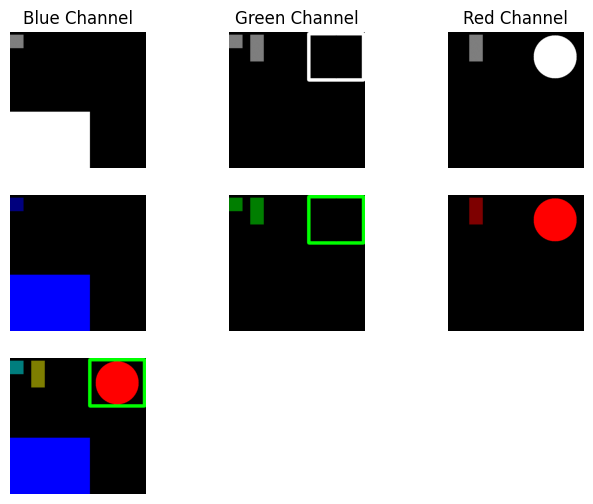

In [11]:
split_img_into_channels( img, (8, 6) )

# Blending

## References

- [wiki: alpha composition](https://en.wikipedia.org/wiki/Alpha_compositing)

In [9]:
# https://news.unl.edu/article/unl-physicists-gear-up-for-upgrades-to-large-hadron-collider
lhc_url = 'https://news.unl.edu/sites/default/files/styles/wide/public/media/images/cms-inner-tracker-barrel1.jpg?itok=UvQ_MZIR'

# https://www.scientificamerican.com/article/particle-physicists-turn-to-ai-to-cope-with-cerns-collision-deluge/
particle_url = 'https://static.scientificamerican.com/sciam/cache/file/49EE0248-2D7E-41BC-8D88E35FA7D92C5A_source.png?w=1350'

IMGS['lhc.jpg'] = IMG_PATH / 'lhc.jpg'
IMGS['particle.png'] = IMG_PATH / 'particle.png'


lhc_img = cv_img_from_url(lhc_url, IMGS['lhc.jpg'])
particle_img = cv_img_from_url(particle_url, IMGS['particle.png'])

In [10]:
lhc_img.shape, lhc_img[0, 0]

((612, 1090, 3), array([215, 237, 248], dtype=uint8))

In [11]:
particle_img.shape, particle_img[0, 0]

((713, 1350, 3), array([0, 0, 0], dtype=uint8))

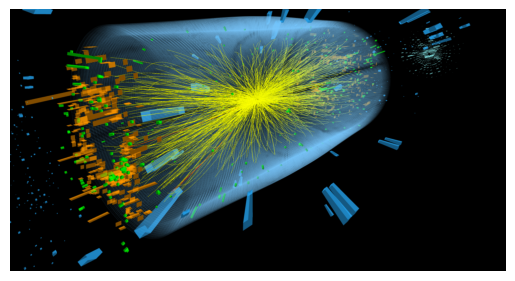

In [12]:
plt.imshow( cv.cvtColor(particle_img, cv.COLOR_BGR2RGB) )
plt.axis('off')    
plt.show()

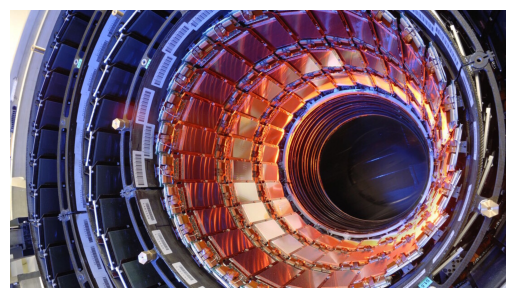

In [13]:
plt.imshow( cv.cvtColor(lhc_img, cv.COLOR_BGR2RGB) )
plt.axis('off')    
plt.show()

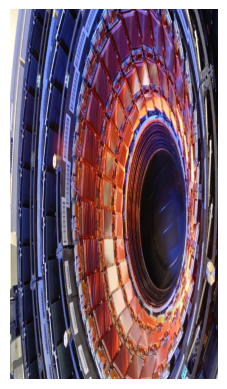

In [14]:
# Interpolation flags
# https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gga5bb5a1fea74ea38e1a5445ca803ff121ac97d8e4880d8b5d509e96825c7522deb

# Scaling the image to its size.
# The width and height will be "swapped" because the resize() fn expects the width, number of columns, and
# height, number of rows, in that order. Which is the opposite order in whice .shape prints them.
lhc_upscale_img = cv.resize(lhc_img, lhc_img.shape[:2], interpolation=cv.INTER_AREA)

plt.imshow( cv.cvtColor(lhc_upscale_img, cv.COLOR_BGR2RGB) )
plt.axis('off')    
plt.show()

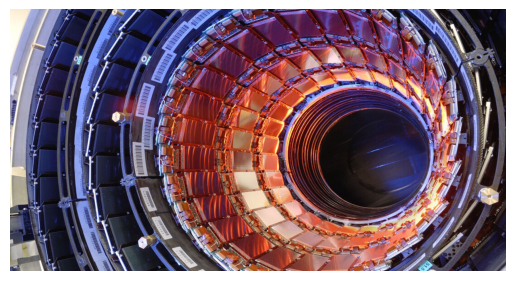

In [15]:
lhc_upscale_img = cv.resize(lhc_img, (particle_img.shape[1], particle_img.shape[0]), interpolation=cv.INTER_CUBIC)

plt.imshow( cv.cvtColor(lhc_upscale_img, cv.COLOR_BGR2RGB) )
plt.axis('off')    
plt.show()

In [16]:
lhc_upscale_img.shape, particle_img.shape

((713, 1350, 3), (713, 1350, 3))

In [17]:
img1 = lhc_upscale_img
img2 = particle_img


# MP4 video codec ('mp4v') used in your code isn't widely supported by web browsers.
video_path = IMG_PATH / 'blended.mp4'
out = cv.VideoWriter(
    video_path,
    cv.VideoWriter_fourcc(*'avc1'),  # or 'H264' - this is H.264 codec
    #cv.VideoWriter_fourcc(*'mp4v'),  # Codec for .mp4.
    30,                              # Frames per second.
    (img1.shape[1], img1.shape[0]),  # (width, height).
)

num_frames = 200
for i in range(num_frames + 1):
    alpha = i / num_frames
    blended = cv.addWeighted(img1, 1 - alpha, img2, alpha, 0)
    out.write(blended)

out.release()

In [18]:
Video(video_path, width=500, height=300)

In [19]:
def create_transition_video(
    images: list[np.ndarray],
    /,
    output_path: Path | str,
    *,
    fps: int = 30,
    frames_per_transition: int = 100,
    pause_frames: int = 1
) -> None:
    """
    Create a video transitioning through multiple images.
    
    INPUTS
    ------
    images: List of images as numpy arrays (BGR format for OpenCV).
    output_path: Path for output video file.
    fps: Frames per second.
    frames_per_transition: Number of frames for each transition.
    pause_frames: Number of frames to pause on each image.
    """
    if len(images) < 2:
        raise ValueError("Need at least 2 images to create transitions")

    # Check all images have same dimensions as first image.
    reference_shape = images[0].shape
    if not all(img.shape == reference_shape for img in images):
        raise ValueError(f'All images must have same dimensions as first image: {reference_shape}')
        
    out = cv.VideoWriter(
        output_path,
        cv.VideoWriter_fourcc(*'avc1'),
        fps,
        (images[0].shape[1], images[0].shape[0])
    )
    
    for i in tqdm(range(len(images) - 1), desc="Processing image pairs"):
        for _ in range(pause_frames):
            out.write(images[i])
            
        for frame in tqdm(range(frames_per_transition + 1), desc=f'Blending {i}->{i+1}', leave=False):
            alpha = frame / frames_per_transition
            blended = cv.addWeighted(images[i], 1 - alpha, images[i + 1], alpha, 0)
            out.write(blended)
    
    for _ in range(pause_frames):
        out.write(images[-1])
        
    out.release()

In [20]:
# https://physics.stackexchange.com/questions/629009/is-there-a-motion-picture-of-sub-atomic-particle-collisions
img3_url = 'https://i.sstatic.net/Ofr0L.jpg'
IMGS['particle_book.jpg'] = IMG_PATH / 'particle_book.jpg'

img3_original = cv_img_from_url(img3_url, IMGS['particle_book.jpg'])
img3 = cv.resize(img3_original, (particle_img.shape[1], particle_img.shape[0]) )

In [21]:
video_path = IMG_PATH / 'three_images.mp4'
create_transition_video([img1, img2, img3], video_path, pause_frames=6)

Video(video_path, width=500, height=300)

Processing image pairs:   0%|          | 0/2 [00:00<?, ?it/s]

Blending 0->1:   0%|          | 0/101 [00:00<?, ?it/s]

Blending 1->2:   0%|          | 0/101 [00:00<?, ?it/s]

## Aspect Ratio

It is important to maintain the aspect ratio when resizing an image otherwise shapes may be distorted (i.e., a circle becomes an oval).

### References

- [wiki: aspect ratio](https://en.wikipedia.org/wiki/Aspect_ratio_(image))

In [22]:
def resize_maintaining_aspect_ratio_target_height(image: np.ndarray, target_height: int) -> np.ndarray:
    """Resize image to target height while maintaining aspect ratio """
    h, w = image.shape[:2]
    aspect_ratio = w / h
    new_width = int(target_height * aspect_ratio)
    return cv.resize(image, (new_width, target_height))


def resize_maintaining_aspect_ratio_target_width(image: np.ndarray, target_width: int) -> np.ndarray:
    """Resize image to target height while maintaining aspect ratio """
    h, w = image.shape[:2]
    aspect_ratio = w / h
    new_height = int(target_width / aspect_ratio)
    print(f'target_width, new_height: {target_width} {new_height}')
    return cv.resize(image, (target_width, new_height))


def crop_images_based_on_height(images: list[np.ndarray]) -> list[np.ndarray]:
    # Check all images have same dimensions as first image.
    reference_shape = images[1].shape[1]
    if not all(img.shape[1] == reference_shape for img in images):
        raise ValueError('All images must have the same width')
    
    # Find smallest height.
    min_height = np.min([img.shape[0] for img in images])
    
    # Crop all images to smallest height (from center).
    standardized_images = []
    for idx, img in enumerate(images):
        if img.shape[0] > min_height:
            # Calculate crop boundaries.
            excess = img.shape[0] - min_height
            top = excess // 2
            bottom = top + min_height
            standardized_images.append(img[top:bottom, :])
            print(f'cropped {excess} pixels from image {idx}')
        else:
            standardized_images.append(img)
            
    return standardized_images

In [23]:
img1 = lhc_img
img2 = particle_img
img3 = img3_original

images = [img1, img2, img3]

max_width = np.max([img.shape[1] for img in images])

resized_images = [resize_maintaining_aspect_ratio_target_width(img, max_width) for img in images]

target_width, new_height: 1350 757
target_width, new_height: 1350 713
target_width, new_height: 1350 1075


In [24]:
[img.shape for img in images]

[(612, 1090, 3), (713, 1350, 3), (478, 600, 3)]

In [25]:
[img.shape for img in resized_images]

[(757, 1350, 3), (713, 1350, 3), (1075, 1350, 3)]

In [26]:
croped_images = crop_images_based_on_height(resized_images)
[img.shape for img in croped_images]

cropped 44 pixels from image 0
cropped 362 pixels from image 2


[(713, 1350, 3), (713, 1350, 3), (713, 1350, 3)]

In [27]:
# The third image is the one that had the most pixels cropped off.
# COmpare the third image in this video with the following video:
# The rightmost circle became an oval in the first video where we just scaled
# everything ignoring the aspect ratio of each image.

video_path = IMG_PATH / 'three_images_resized.mp4'
create_transition_video(croped_images, video_path, pause_frames=6)

Video(video_path, width=500, height=300)

Processing image pairs:   0%|          | 0/2 [00:00<?, ?it/s]

Blending 0->1:   0%|          | 0/101 [00:00<?, ?it/s]

Blending 1->2:   0%|          | 0/101 [00:00<?, ?it/s]

# Masks

In [28]:
import ipywidgets as widgets
from IPython.display import display
from matplotlib.widgets import RectangleSelector

In [29]:
%matplotlib widget

In [30]:
plt.close('all')

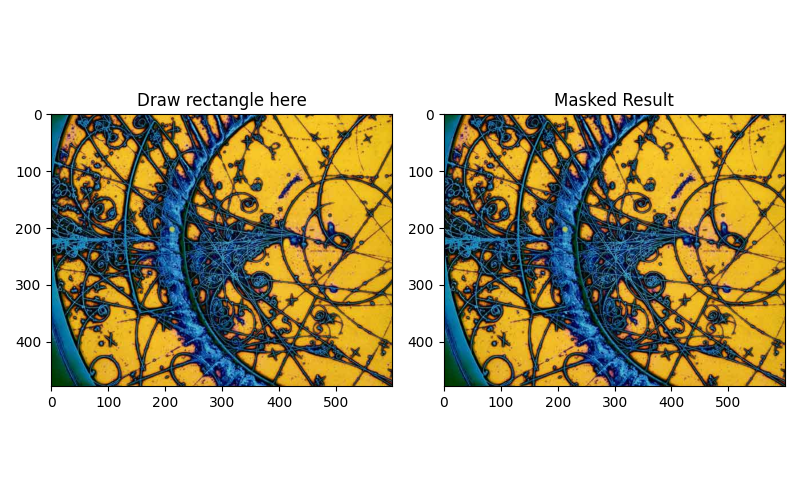

In [31]:
def create_interactive_mask(img_path):
    """
    Creates an interactive interface for drawing rectangular masks on an image.
    
    INPUTS
    ------
    img_path: Path to the image file (can be string or Path object)
        
    RETURNS
    -------
    tuple: (figure, mask, selector) - The matplotlib figure, mask array, and selector object
    """
    # Read and convert image.
    img = cv.imread(img_path)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    # Create mask as a nonlocal variable so it can be modified in onselect.
    nonlocal_vars = {
        'mask': np.zeros(img.shape[:2], dtype=np.uint8)
    }
    
    # Create the figure and axis.
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
    
    def onselect(eclick, erelease):
        """Handle rectangle selection"""
        x1, y1 = int(eclick.xdata), int(eclick.ydata)
        x2, y2 = int(erelease.xdata), int(erelease.ydata)
        
        # Reset mask.
        nonlocal_vars['mask'][:] = 0
        
        # Create rectangle on mask.
        nonlocal_vars['mask'][min(y1, y2):max(y1, y2), min(x1, x2):max(x1, x2)] = 255
        
        # Apply mask to image.
        masked_img = cv.bitwise_and(img_rgb, img_rgb, mask=nonlocal_vars['mask'])
        
        # Update the right plot.
        ax2.clear()
        ax2.imshow(masked_img)
        ax2.set_title('Masked Result')
        plt.draw()
    
    # Setup initial plots.
    ax1.imshow(img_rgb)
    ax1.set_title('Draw rectangle here')
    
    ax2.imshow(img_rgb)
    ax2.set_title('Masked Result')
    
    # Create the rectangle selector.
    selector = RectangleSelector(ax1, onselect, interactive=True)
    
    plt.tight_layout()
    
    return fig, nonlocal_vars['mask'], selector

img_path = IMG_PATH / 'particle_book.jpg'
fig, mask, selector = create_interactive_mask(img_path)
plt.show()

In [32]:
plt.close('all')

In [33]:
def create_interactive_mask(img_path):
    """
    Creates an interactive interface for drawing rectangular masks on an image 
    and showing RGB channel histograms of the selected region.
    
    INPUTS
    ------
    img_path: Path to the image file (can be string or Path object)
        
    RETURNS
    -------
    tuple: (figure, mask, selector) - The matplotlib figure, mask array, and selector object
    """
    # Read and convert image.
    img = cv.imread(str(img_path))
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    # Create mask as a nonlocal variable so it can be modified in onselect.
    nonlocal_vars = {
        'mask': np.zeros(img.shape[:2], dtype=np.uint8)
    }
    
    # Create the figure and axes - now 2 rows, with histogram at bottom.
    fig = plt.figure(figsize=(8, 8))
    gs = fig.add_gridspec(2, 2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, :])  # Histogram takes full width of bottom row.
    
    def plot_histograms(masked_img, ax):
        """Plot RGB histograms for the masked region"""
        colors = ('red', 'green', 'blue')
        ax.clear()
        
        for i, color in enumerate(colors):
            # Calculate histogram for this channel.
            hist = cv.calcHist([masked_img], [i], nonlocal_vars['mask'], [256], [0, 256])
            ax.plot(hist, color=color, alpha=0.7, label=f'{color} channel')
        
        ax.set_xlim([0, 256])
        ax.set_title('RGB Histograms of Selected Region')
        ax.set_xlabel('Pixel Value')
        ax.set_ylabel('Count')
        ax.legend()
        ax.grid(True, alpha=0.2)
    
    def onselect(eclick, erelease):
        """Handle rectangle selection"""
        x1, y1 = int(eclick.xdata), int(eclick.ydata)
        x2, y2 = int(erelease.xdata), int(erelease.ydata)
        
        # Reset mask.
        nonlocal_vars['mask'][:] = 0
        
        # Create rectangle on mask.
        nonlocal_vars['mask'][min(y1, y2):max(y1, y2), min(x1, x2):max(x1, x2)] = 255
        
        # Apply mask to image.
        masked_img = cv.bitwise_and(img_rgb, img_rgb, mask=nonlocal_vars['mask'])
        
        # Update the right plot.
        ax2.clear()
        ax2.imshow(masked_img)
        ax2.set_title('Masked Result')
        
        # Update histogram.
        plot_histograms(img_rgb, ax3)
        
        plt.draw()
    
    # Setup initial plots.
    ax1.imshow(img_rgb)
    ax1.set_title('Draw rectangle here')
    
    ax2.imshow(img_rgb)
    ax2.set_title('Masked Result')
    
    # Initial empty histogram.
    ax3.set_title('RGB Histograms of Selected Region')
    ax3.set_xlabel('Pixel Value')
    ax3.set_ylabel('Count')
    ax3.grid(True, alpha=0.2)
    
    # Create the rectangle selector.
    selector = RectangleSelector(ax1, onselect, interactive=True)
    
    plt.tight_layout()
    
    return fig, nonlocal_vars['mask'], selector

In [34]:
IMGS

{'fjord.jpg': PosixPath('img/001-images/fjord.jpg'),
 'bliss.jpg': PosixPath('img/001-images/bliss.jpg'),
 'op.png': PosixPath('img/001-images/op.png'),
 'lhc.jpg': PosixPath('img/001-images/lhc.jpg'),
 'particle.png': PosixPath('img/001-images/particle.png'),
 'particle_book.jpg': PosixPath('img/001-images/particle_book.jpg')}

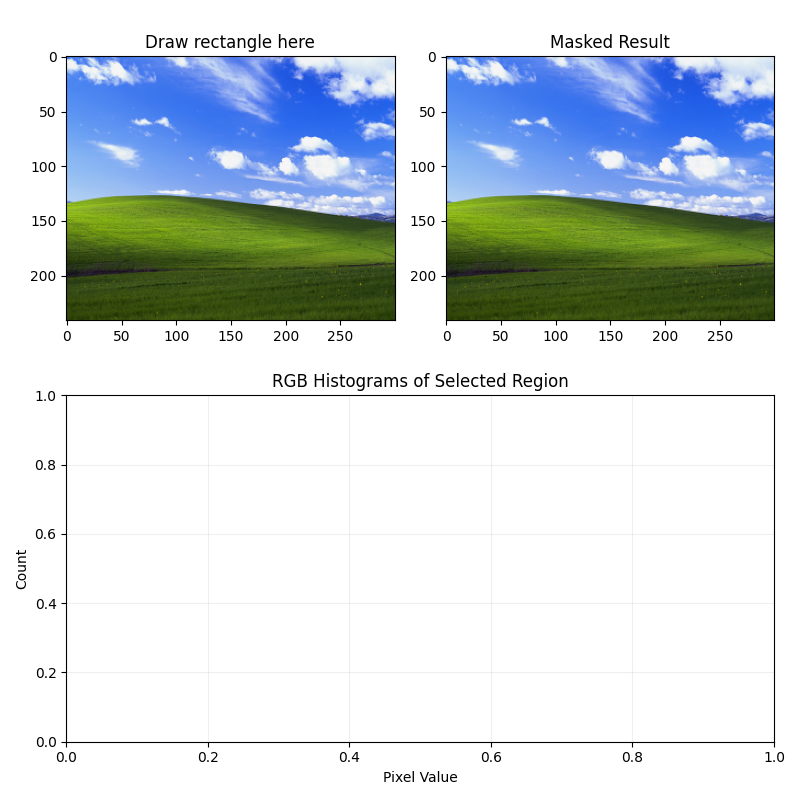

In [36]:
fig, mask, selector = create_interactive_mask(IMGS['bliss.jpg'])
plt.show()